# Earnings Explorer: Unraveling Salary Insights
___
author -**Athul MK**     internship_project - **@Cognorise_infotech**


![Image](C:\Users\lenovo\Downloads\salary-accelerator2-1.jpg)


# **Objective**
The objective of this analysis is to gain a comprehensive understanding of the dataset, which contains information related to job positions, salaries, and various associated factors. The primary goals include exploring the distribution of salaries, identifying trends and patterns in salary levels over different work years, and understanding the impact of factors like experience level, employment type, and remote work ratio on salaries. Additionally, we aim to perform statistical analysis and data visualization to extract valuable insights that can inform businesses and professionals in the job market. By achieving these objectives, we seek to provide actionable insights and knowledge that can aid in making informed decisions related to job compensation, career choices, and remote work opportunities.

## Library

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor



## Import data 

In [2]:
data = pd.read_csv('ds_salaries.csv')

## Data Exploration

In [3]:
data.head()


Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

In [34]:
data.tail()

Unnamed: 0  work_year experience_level employment_type      job_title  \
602         602       2022               SE              FT  Data Engineer   
603         603       2022               SE              FT  Data Engineer   
604         604       2022               SE              FT   Data Analyst   
605         605       2022               SE              FT   Data Analyst   
606         606       2022               MI              FT   AI Scientist   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
602  154000             USD         154000                 US           100   
603  126000             USD         126000                 US           100   
604  129000             USD         129000                 US             0   
605  150000             USD         150000                 US           100   
606  200000             USD         200000                 IN           100   

    company_location company_size  
602               US            M  
603               US            M  
604               US            M  
605               US            M  
606               US            L

In [35]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [37]:
data.dtypes


Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [38]:
data.isnull()

Unnamed: 0  work_year  experience_level  employment_type  job_title  \
0         False      False             False            False      False   
1         False      False             False            False      False   
2         False      False             False            False      False   
3         False      False             False            False      False   
4         False      False             False            False      False   
..          ...        ...               ...              ...        ...   
602       False      False             False            False      False   
603       False      False             False            False      False   
604       False      False             False            False      False   
605       False      False             False            False      False   
606       False      False             False            False      False   

     salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0     False            False          False               False         False   
1     False            False          False               False         False   
2     False            False          False               False         False   
3     False            False          False               False         False   
4     False            False          False               False         False   
..      ...              ...            ...                 ...           ...   
602   False            False          False               False         False   
603   False            False          False               False         False   
604   False            False          False               False         False   
605   False            False          False               False         False   
606   False            False          False               False         False   

     company_location  company_size  
0               False         False  
1               False         False  
2               False         False  
3               False         False  
4               False         False  
..                ...           ...  
602             False         False  
603             False         False  
604             False         False  
605             False         False  
606             False         False  

[607 rows x 12 columns]

In [39]:
data.isnull().sum()



Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [40]:
data.shape

(607, 12)

In [41]:
data.describe()

Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000

In [42]:
data.describe(include='object').T

count unique             top freq
experience_level     607      4              SE  280
employment_type      607      4              FT  588
job_title            607     50  Data Scientist  143
salary_currency      607     17             USD  398
employee_residence   607     57              US  332
company_location     607     50              US  355
company_size         607      3               M  326

In [43]:
unique_values = data.nunique()
unique_values

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

## Exploratory Data analysis & Visualization 

In [45]:
# Calculate summary statistics for 'salary' and 'salary_in_usd'
summary_statistics = data[['salary', 'salary_in_usd']].describe()

# Add median, 25th percentile, and 75th percentile
median = data[['salary', 'salary_in_usd']].median()
percentile_25 = data[['salary', 'salary_in_usd']].quantile(0.25)
percentile_75 = data[['salary', 'salary_in_usd']].quantile(0.75)

summary_statistics.loc['median'] = median
summary_statistics.loc['25th percentile'] = percentile_25
summary_statistics.loc['75th percentile'] = percentile_75

# Print the summary statistics
print(summary_statistics)

                       salary  salary_in_usd
count            6.070000e+02     607.000000
mean             3.240001e+05  112297.869852
std              1.544357e+06   70957.259411
min              4.000000e+03    2859.000000
25%              7.000000e+04   62726.000000
50%              1.150000e+05  101570.000000
75%              1.650000e+05  150000.000000
max              3.040000e+07  600000.000000
median           1.150000e+05  101570.000000
25th percentile  7.000000e+04   62726.000000
75th percentile  1.650000e+05  150000.000000


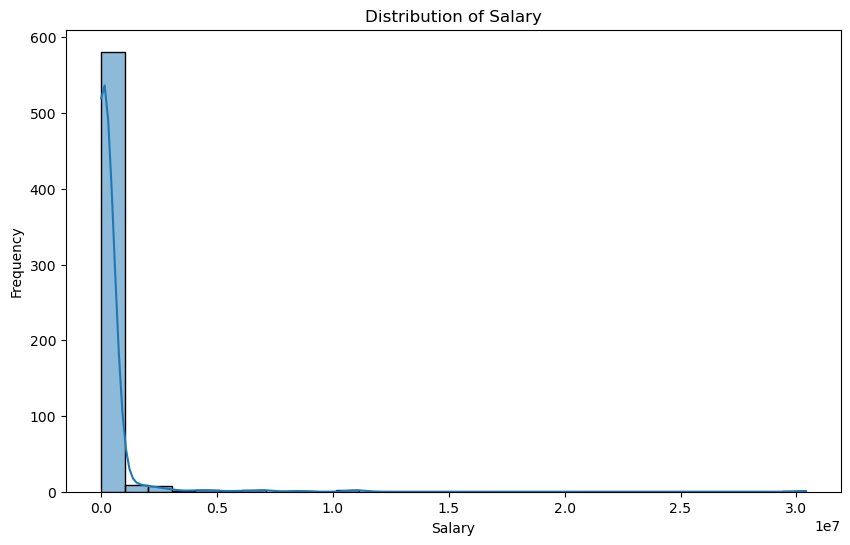

In [57]:
# Let's start with the 'salary' distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['salary'], bins=30, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

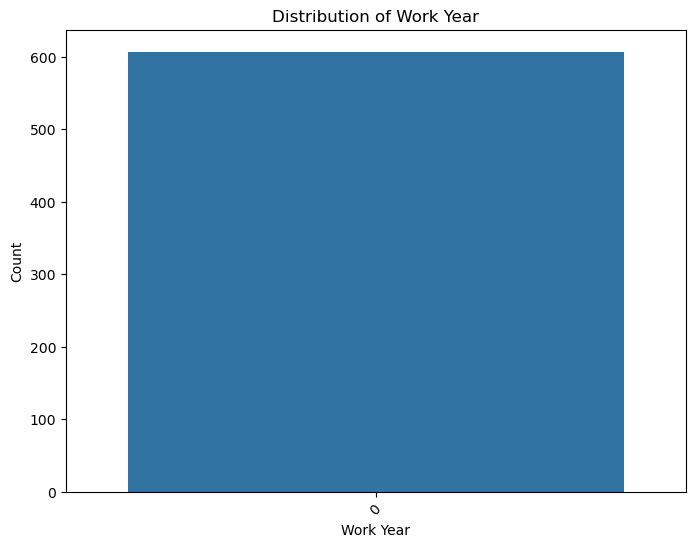

In [58]:
# Distribution of 'work_year'
plt.figure(figsize=(8, 6))
sns.countplot(data['work_year'])
plt.title('Distribution of Work Year')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

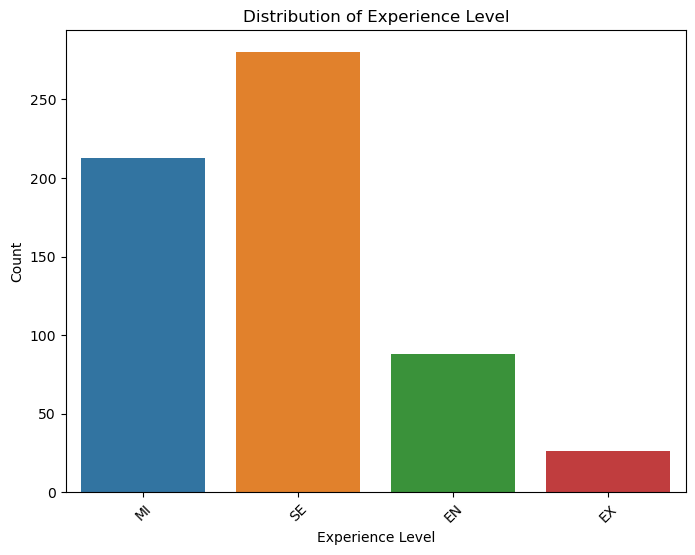

In [59]:
# Distribution of 'experience_level'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='experience_level')
plt.title('Distribution of Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


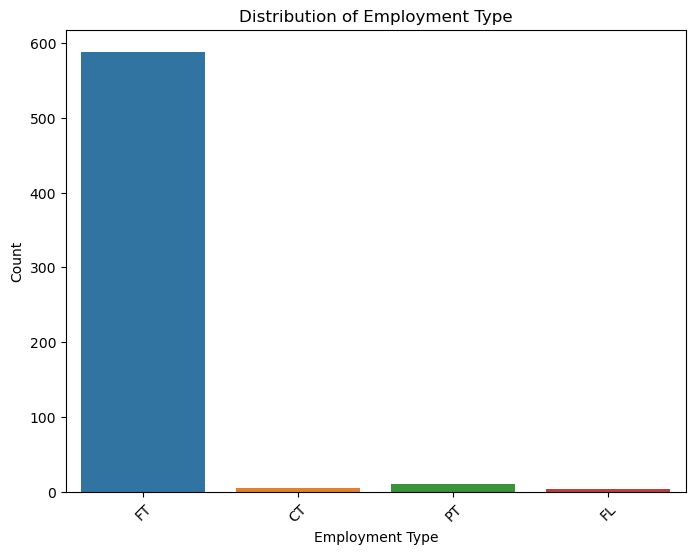

In [60]:
# Distribution of 'employment_type'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='employment_type')
plt.title('Distribution of Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


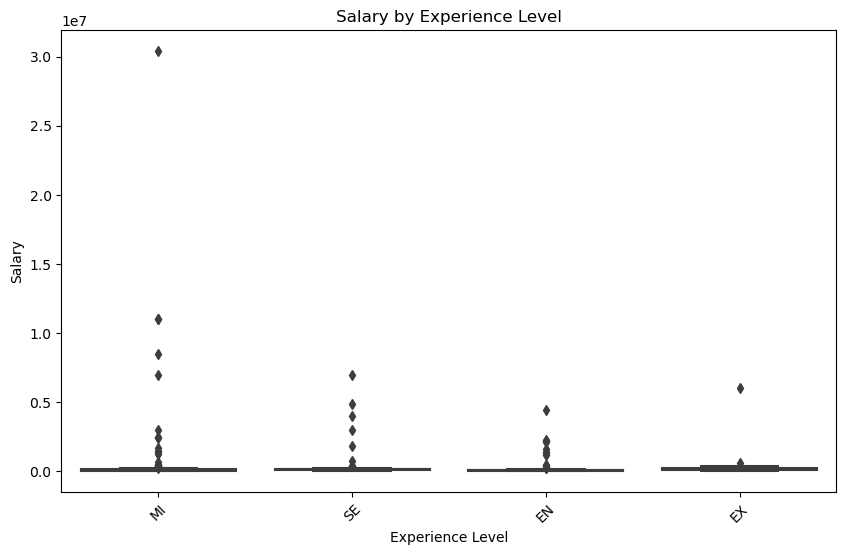

In [61]:
# Box plot of 'experience_level' vs. 'salary'
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary', data=data)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

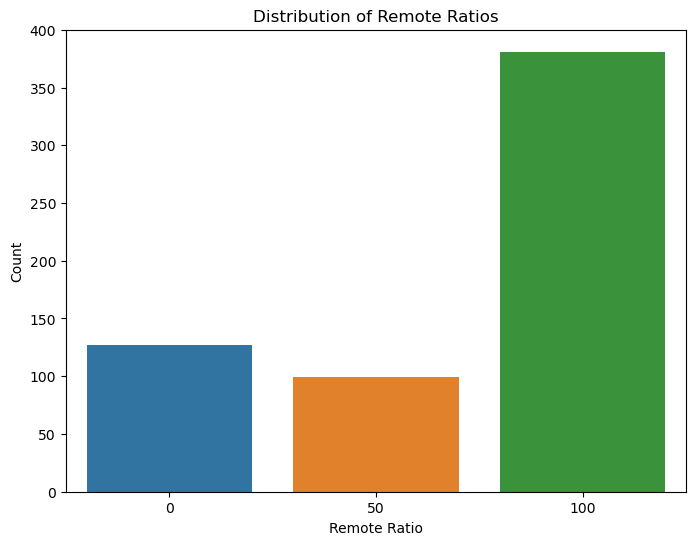

In [62]:
# Count of remote ratios
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='remote_ratio')
plt.title('Distribution of Remote Ratios')
plt.xlabel('Remote Ratio')
plt.ylabel('Count')
plt.show()


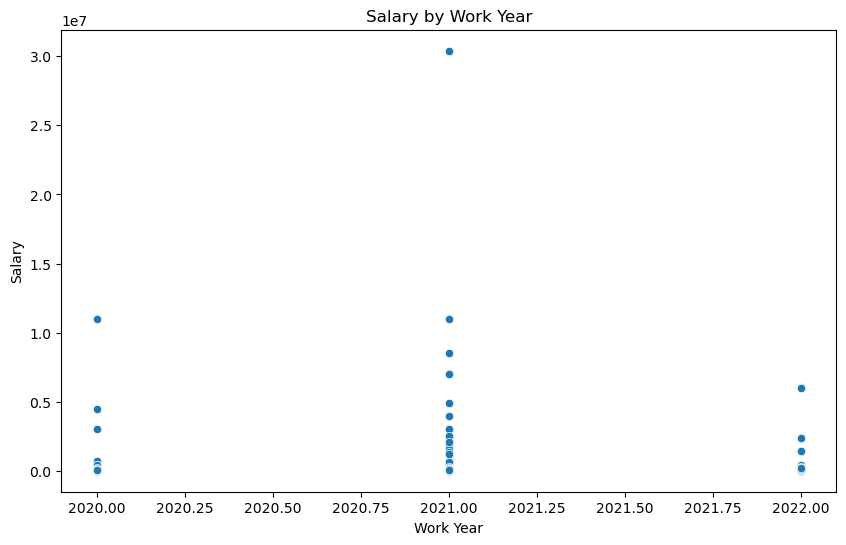

In [63]:
# Scatter plot of 'work_year' vs. 'salary'
plt.figure(figsize=(10, 6))


sns.scatterplot(x='work_year', y='salary', data=data)
plt.title('Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary')
plt.show()

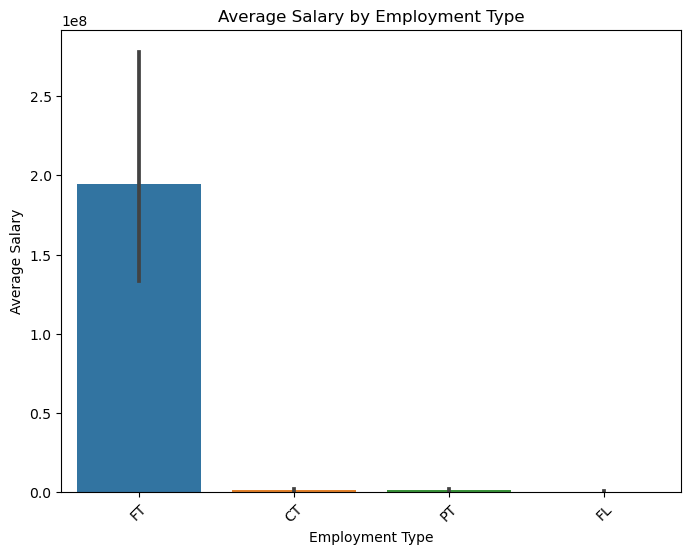

In [64]:
# Bar chart of 'employment_type' and average salary
plt.figure(figsize=(8, 6))
sns.barplot(x='employment_type', y='salary', data=data, estimator=sum)
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

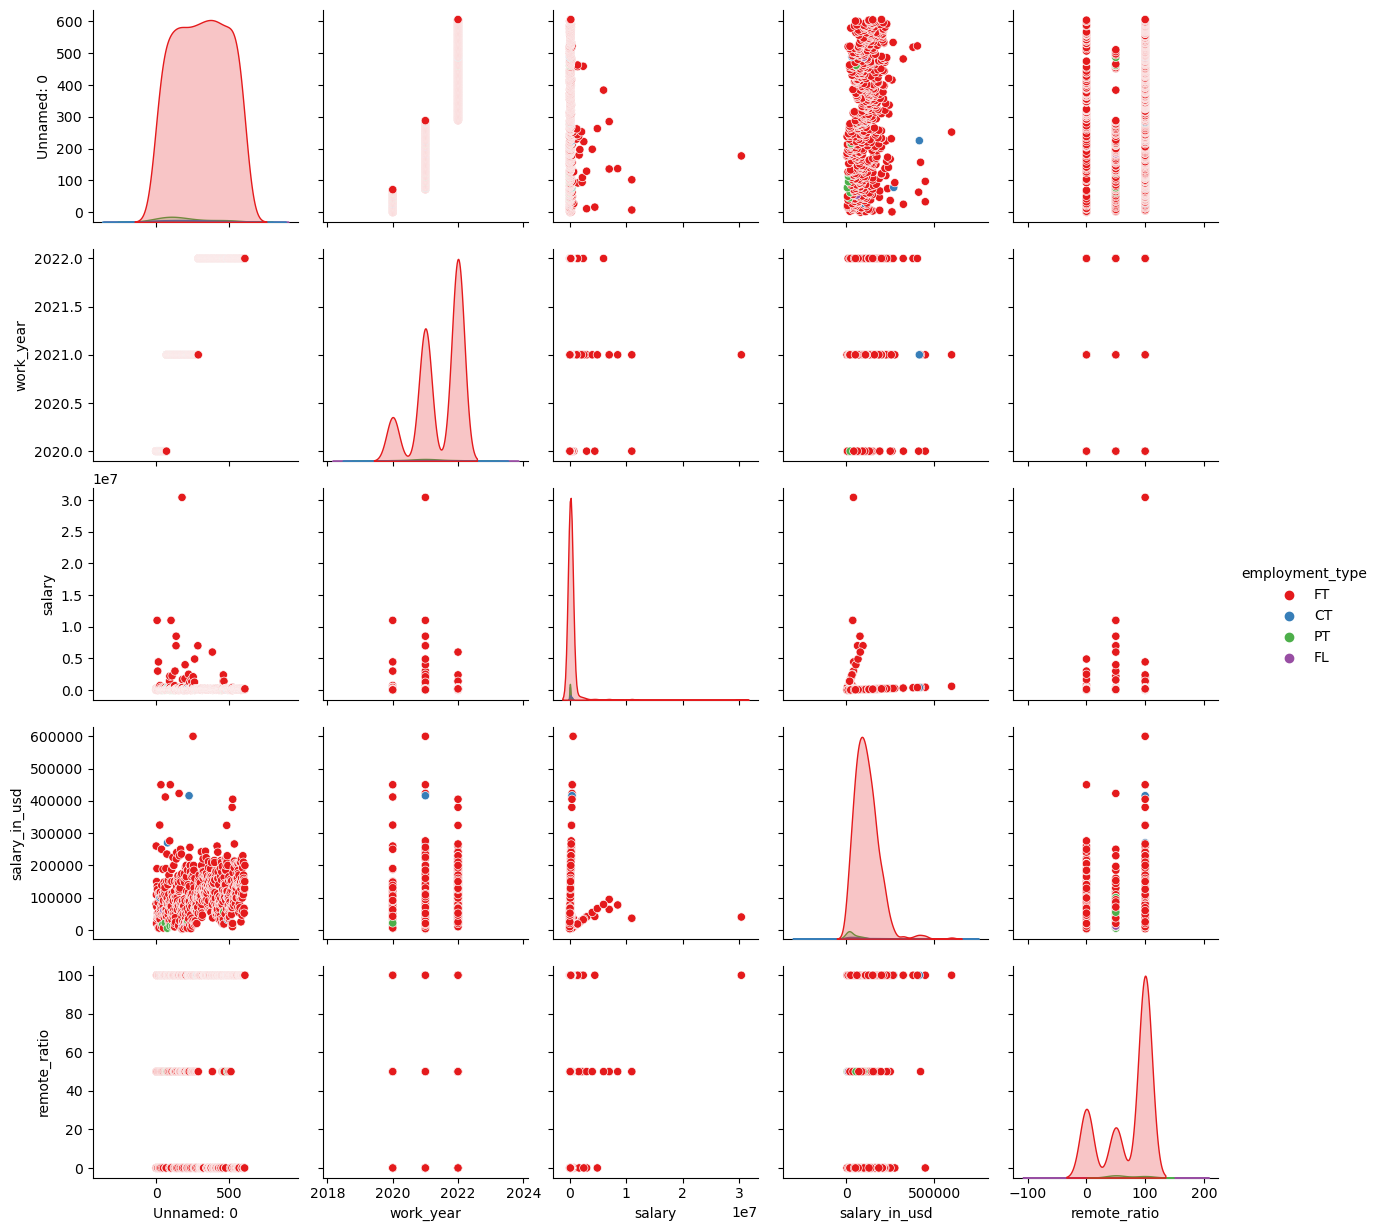

In [65]:
# Pairplot with different colors for categorical variables
sns.pairplot(data, hue='employment_type', palette='Set1', diag_kind='kde')
plt.show()


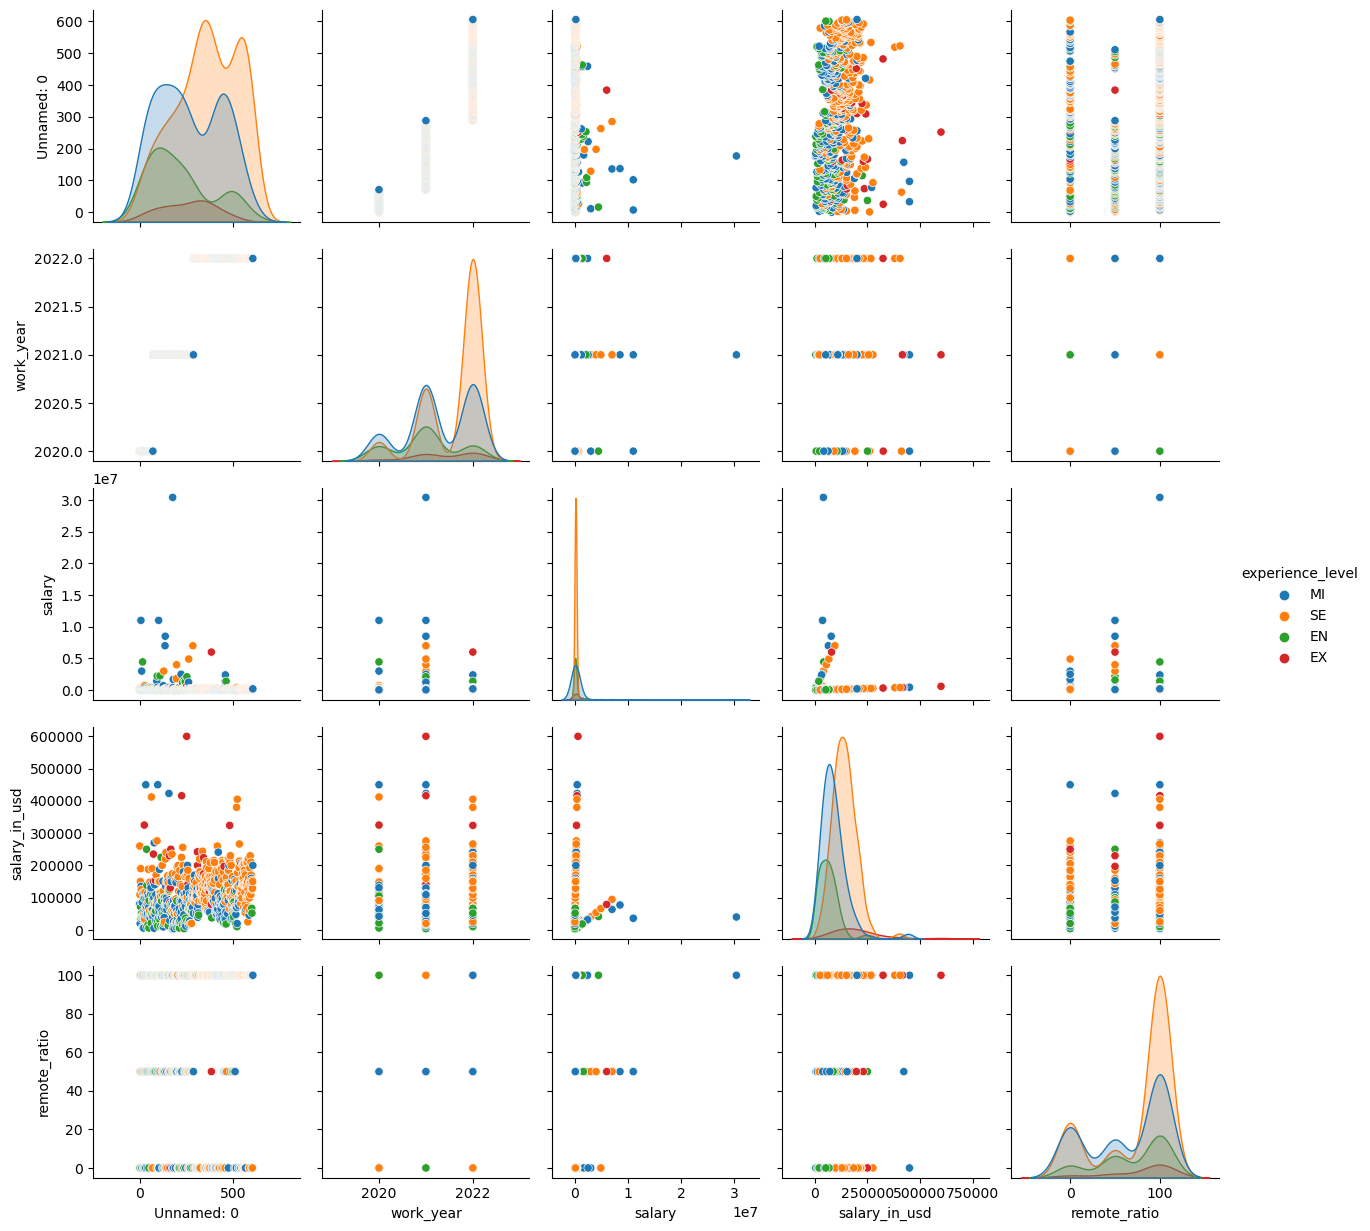

In [66]:
# Pairplot
sns.pairplot(data, hue='experience_level', diag_kind='kde')
plt.show()


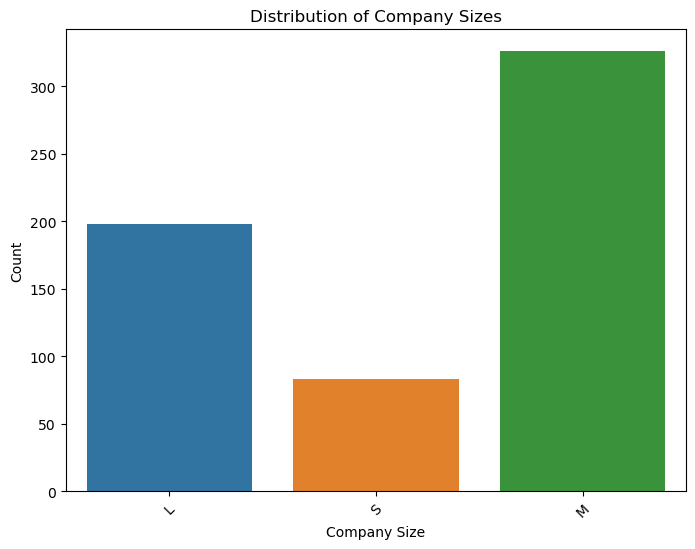

In [67]:
# Bar chart of company sizes
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='company_size')
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


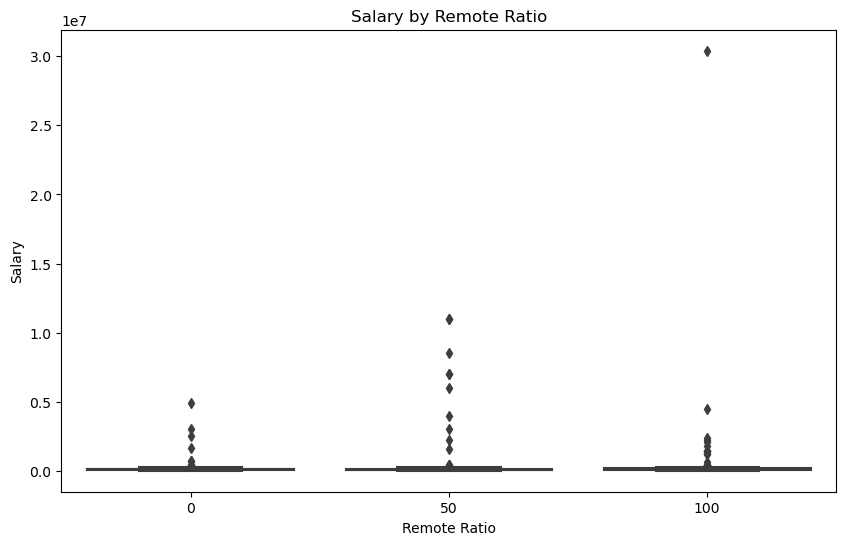

In [68]:
# Box plot of salary by remote ratio
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='remote_ratio', y='salary')
plt.title('Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()


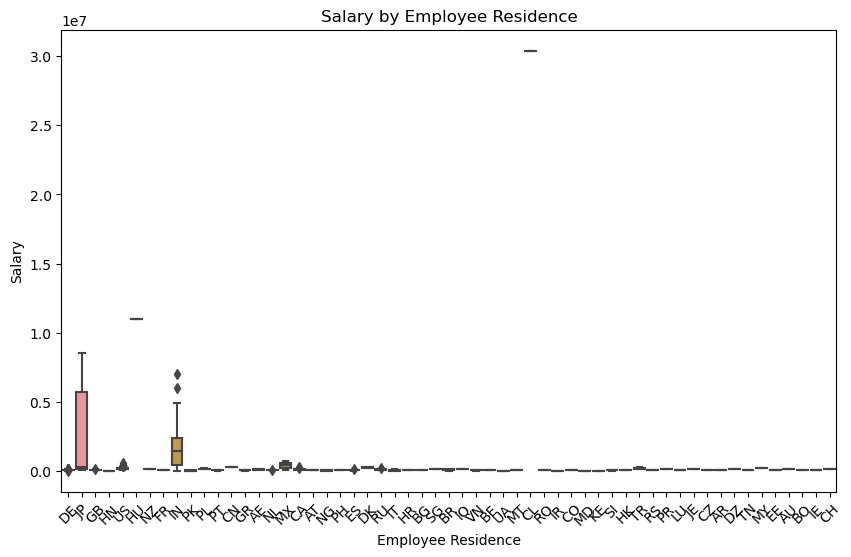

In [69]:
# Box plot of salary by employee residence
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='employee_residence', y='salary')
plt.title('Salary by Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


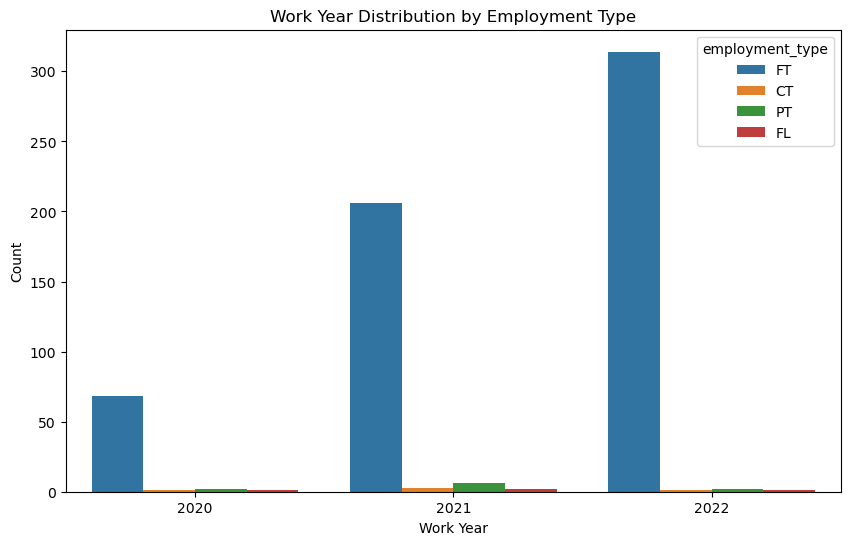

In [70]:
# Countplot of work year by employment type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='work_year', hue='employment_type')
plt.title('Work Year Distribution by Employment Type')
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.show()


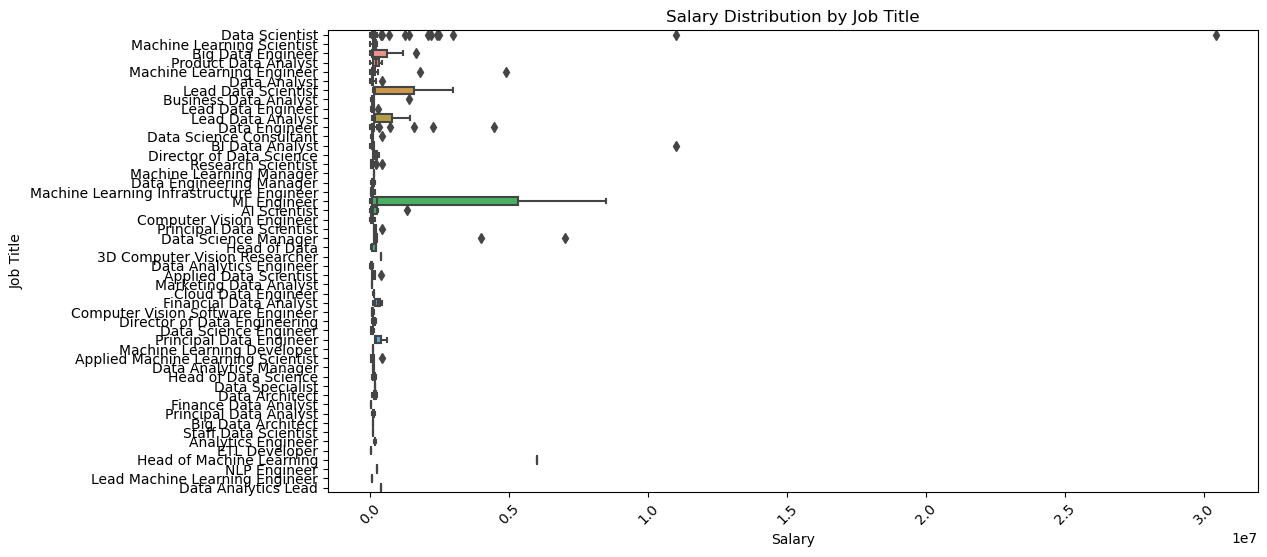

In [71]:
# Box plots by job title
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='salary', y='job_title')
plt.title('Salary Distribution by Job Title')
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.xticks(rotation=45)
plt.show()


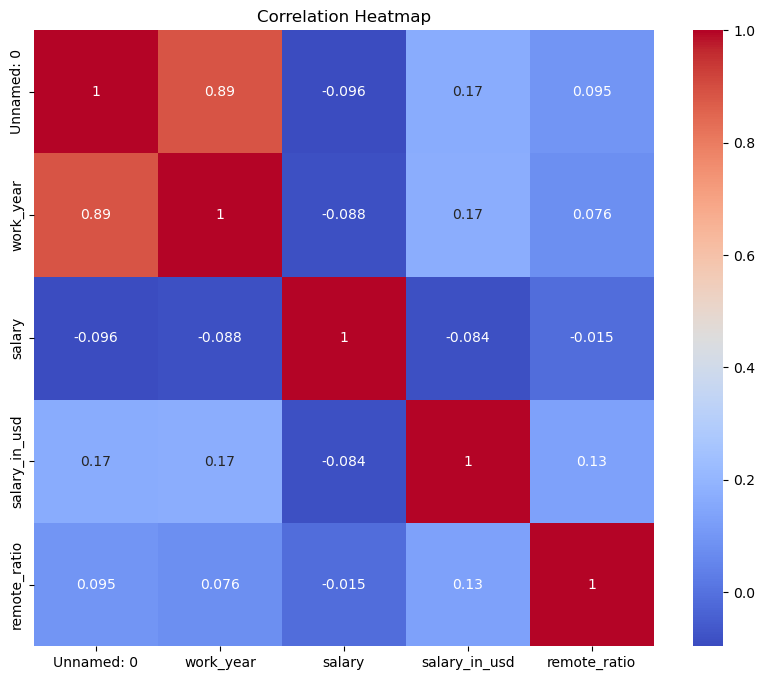

In [72]:
# Selecting only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [73]:
print(corr_matrix )

               Unnamed: 0  work_year    salary  salary_in_usd  remote_ratio
Unnamed: 0       1.000000   0.886550 -0.096250       0.167025      0.095000
work_year        0.886550   1.000000 -0.087577       0.170493      0.076314
salary          -0.096250  -0.087577  1.000000      -0.083906     -0.014608
salary_in_usd    0.167025   0.170493 -0.083906       1.000000      0.132122
remote_ratio     0.095000   0.076314 -0.014608       0.132122      1.000000


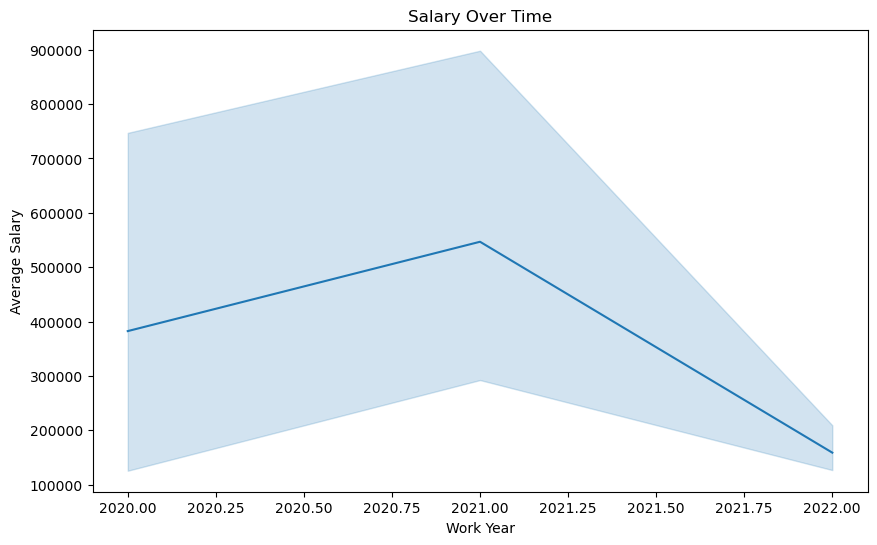

In [74]:
# Line plot of salary over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='work_year', y='salary')
plt.title('Salary Over Time')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.show()


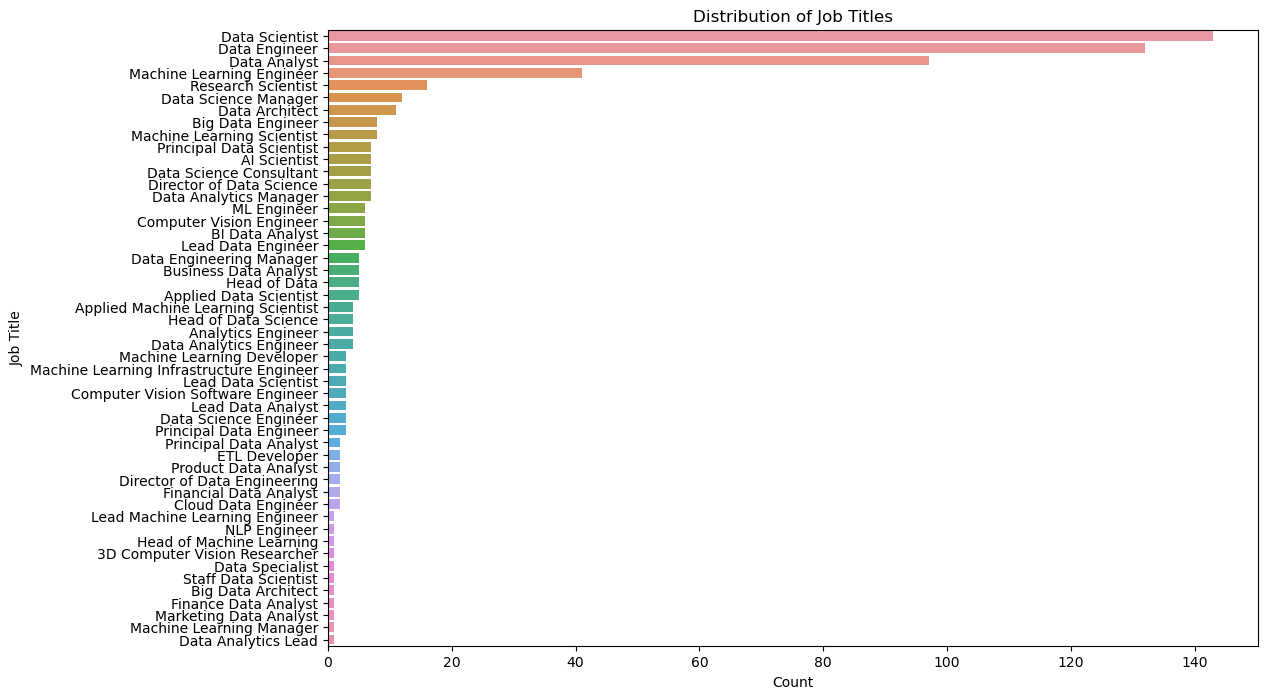

In [75]:
# Count of job titles
plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='job_title', order=data['job_title'].value_counts().index)
plt.title('Distribution of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


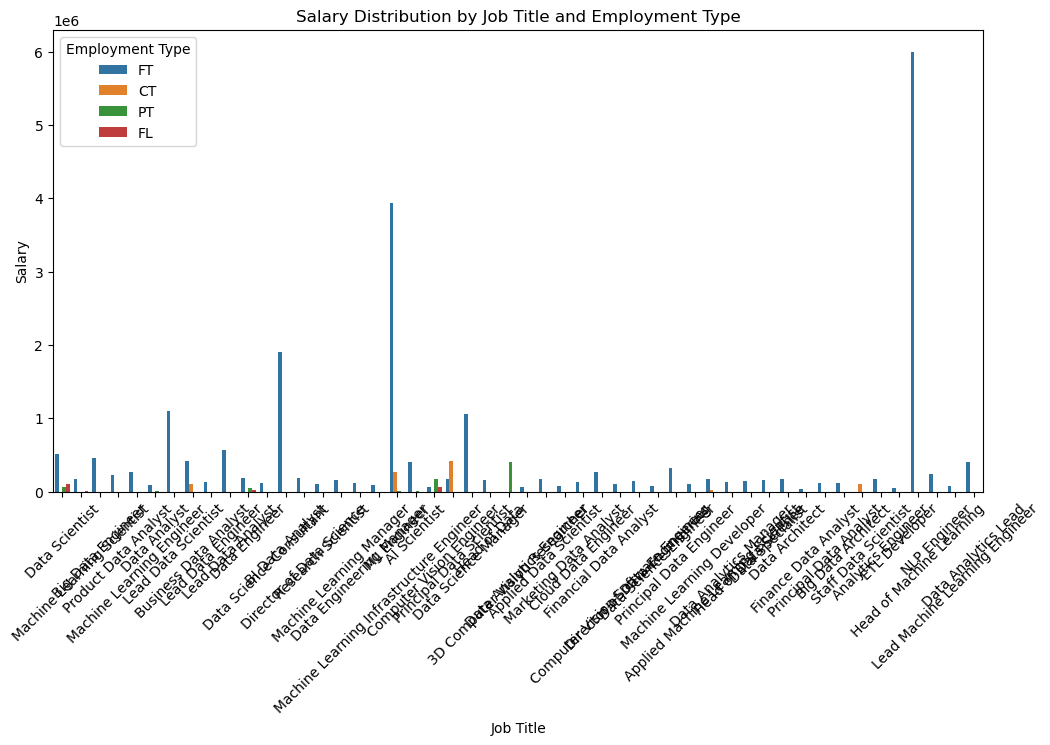

In [76]:
# Grouped bar chart of salary by job title and employment type
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='job_title', y='salary', hue='employment_type', ci=None)
plt.title('Salary Distribution by Job Title and Employment Type')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.legend(title='Employment Type')
plt.show()



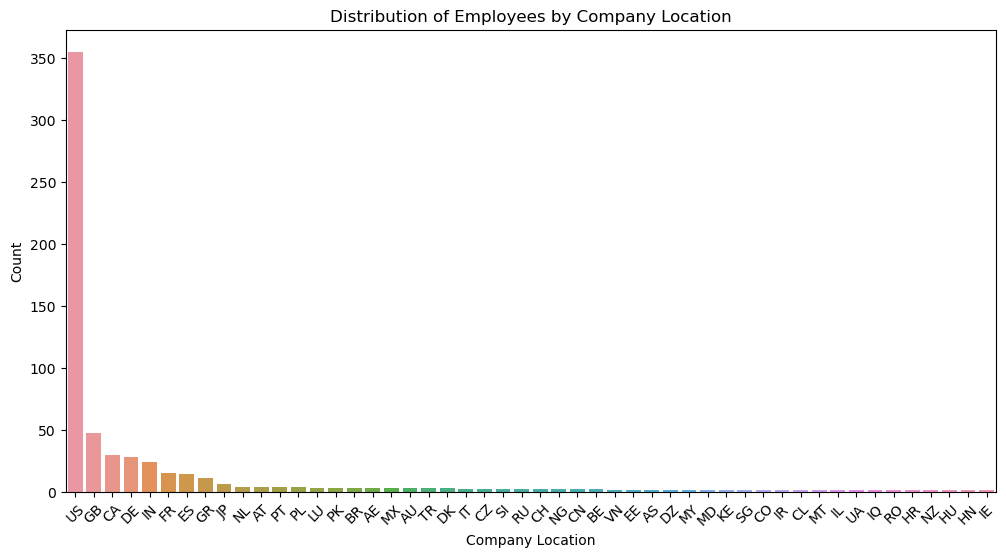

In [77]:
# Count of employees by company location
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='company_location', order=data['company_location'].value_counts().index)
plt.title('Distribution of Employees by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


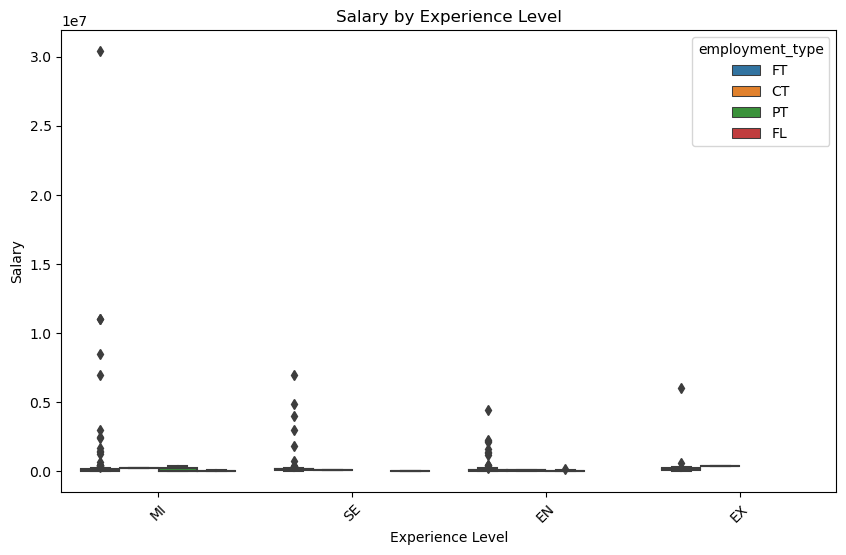

In [78]:
# Box plots of salary by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='experience_level', y='salary', hue='employment_type')
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


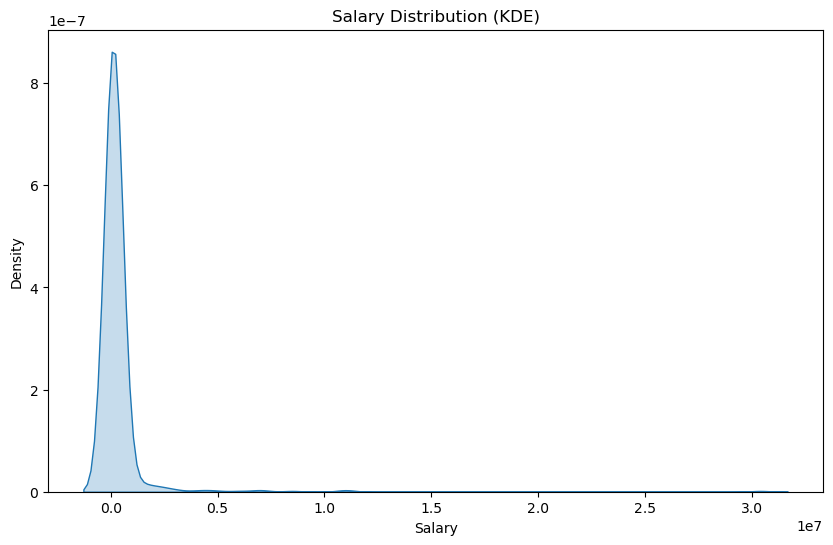

In [79]:
# KDE plot of salary
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data['salary'], shade=True)
plt.title('Salary Distribution (KDE)')
plt.xlabel('Salary')
plt.show()


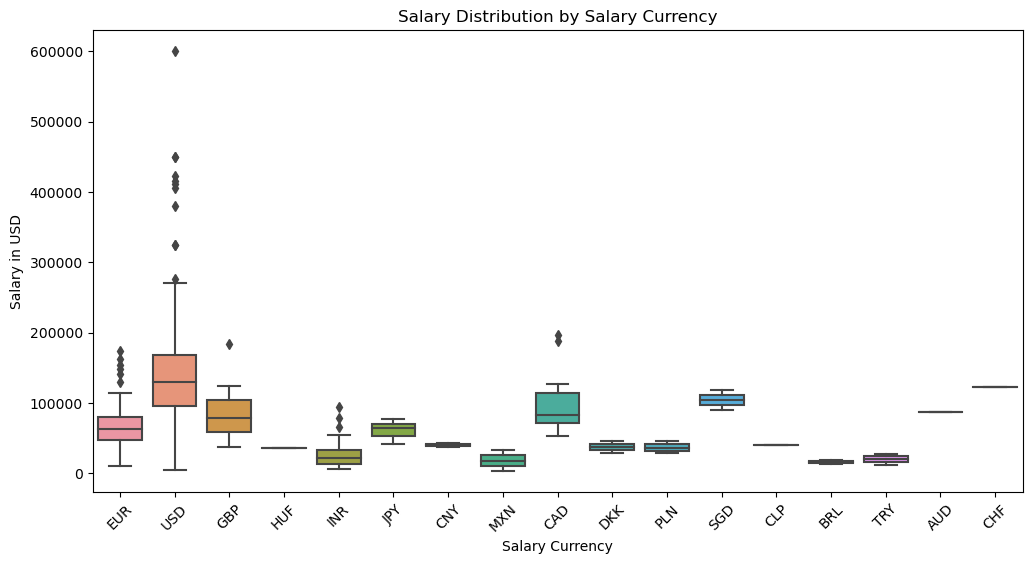

In [80]:
# Box plot of salary by salary currency
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='salary_currency', y='salary_in_usd')
plt.title('Salary Distribution by Salary Currency')
plt.xlabel('Salary Currency')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()


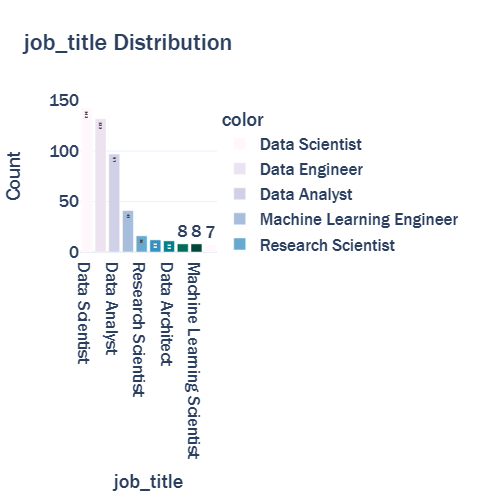

In [86]:
# Calculate the value counts for each unique value in the 'job_title' column
top10_Location = data['job_title'].value_counts()[:10]

# Create a bar plot using Plotly Express
# y-axis: Count of each job title, x-axis: Location,
# color-coded by job titles and using a color palette
fig = px.bar(
    y=top10_Location.values,  # y-values: count of each job title
    x=top10_Location.index,   # x-values: job titles
    color=top10_Location.index,  # Color the bars based on job titles
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=top10_Location.values,  # Display the count values on top of the bars
    title='Top 10 job_title',  # Set the title of the plot
    template='plotly_white'  # Use a dark template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='job_title Distribution',  # Set the title of the plot
    height=500,  # Set the height of the plot
    xaxis_title="job_title",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()


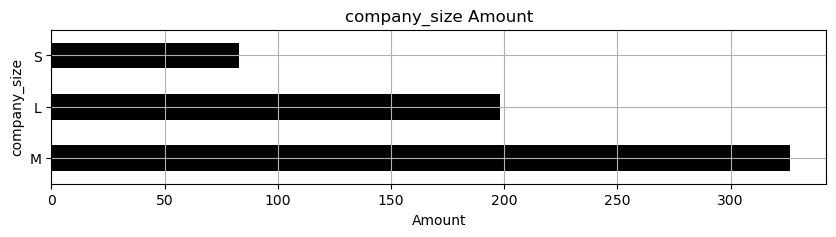

In [87]:
data['company_size'].value_counts().plot(kind = 'barh', figsize = (10,2), grid = True, color='black')
plt.title('company_size Amount')
plt.xlabel('Amount')
plt.ylabel('company_size')
plt.show()

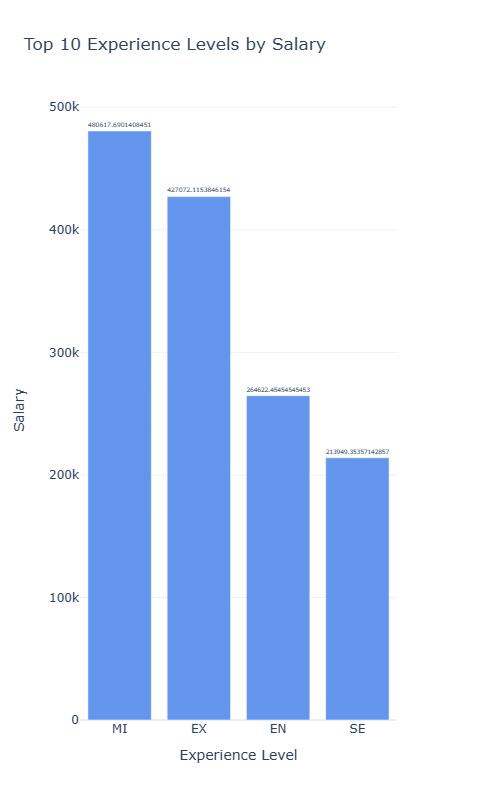

In [83]:
# Calculate the average salary for each experience_level and sort in descending order
average_salary = data.groupby('experience_level')['salary'].mean().reset_index()
average_salary = average_salary.sort_values(by='salary', ascending=False)

# Select the top 10 experience levels with the highest average salary
top_10_salary = average_salary.head(10)

# Create a new figure using Plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1, shared_xaxes=True)

# Add a bar trace to the figure
fig.add_trace(go.Bar(
    x=top_10_salary['experience_level'],  # x-values: experience_level
    y=top_10_salary['salary'],  # y-values: average salary
    marker_color='cornflowerblue',  # Set the color of the bars
    text=top_10_salary['salary'],  # Display the salary values on top of the bars
    textposition='outside'  # Position of the text labels
))

# Update the layout and appearance of the plot
fig.update_layout(
    title='Top 10 Experience Levels by Salary',  # Set the title of the plot
    xaxis_title='Experience Level',  # Label for the x-axis
    yaxis_title='Salary',  # Label for the y-axis
    template='plotly_white',  # Use a light template for the plot
    height=800  # Set the height of the plot
)

# Display the plot
fig.show()


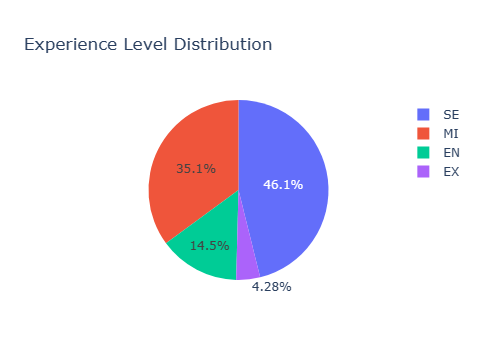

In [90]:
import plotly.express as px

# Create a pie chart for Experience Level
experience_level_counts = data['experience_level'].value_counts()

# Create a pie chart for Job Title
job_title_counts = data['job_title'].value_counts()
fig_job_title = px.pie(job_title_counts, names=job_title_counts.index, values=job_title_counts.values, title='Job Title Distribution')

fig_experience.show()



In [91]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

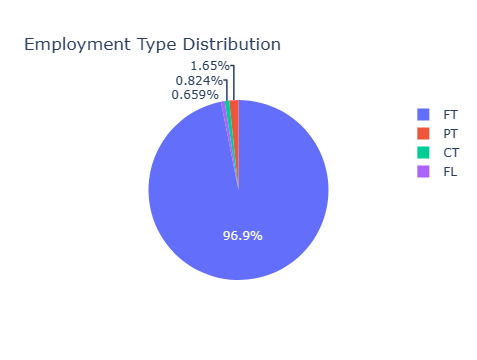

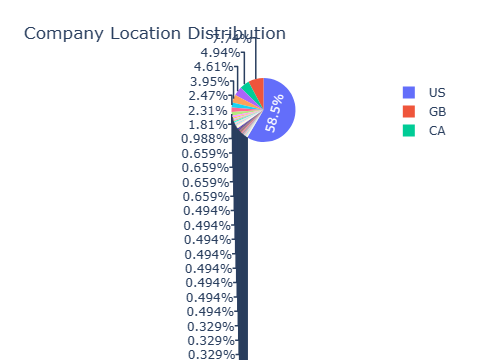

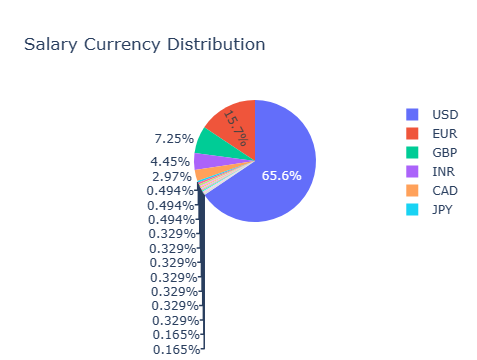

In [93]:
import plotly.express as px

# Create pie chart for 'employment_type'
employment_type_counts = data['employment_type'].value_counts()
fig_employment_type = px.pie(employment_type_counts, names=employment_type_counts.index, values=employment_type_counts.values, title='Employment Type Distribution')

# Create pie chart for 'company_location'
company_location_counts = data['company_location'].value_counts()
fig_company_location = px.pie(company_location_counts, names=company_location_counts.index, values=company_location_counts.values, title='Company Location Distribution')

# Create pie chart for 'salary_currency'
salary_currency_counts = data['salary_currency'].value_counts()
fig_salary_currency = px.pie(salary_currency_counts, names=salary_currency_counts.index, values=salary_currency_counts.values, title='Salary Currency Distribution')

# Display the pie charts separately
fig_employment_type.show()
fig_company_location.show()
fig_salary_currency.show()


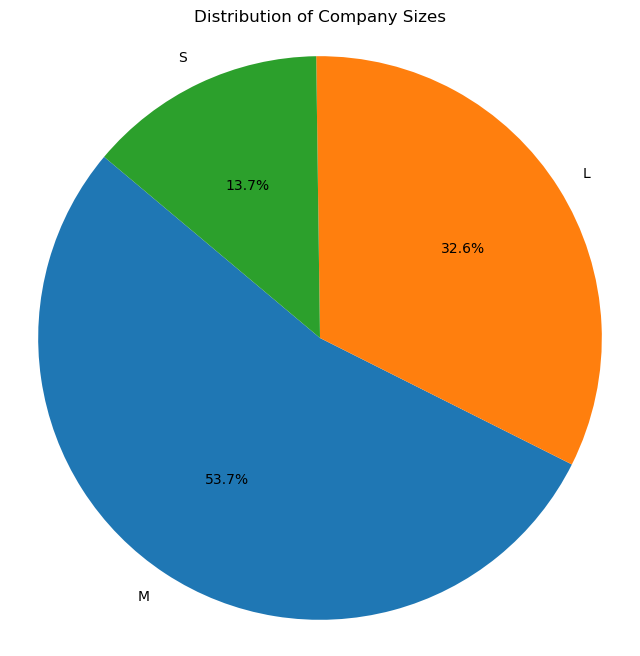

In [95]:
import matplotlib.pyplot as plt

# Group the data by 'company_size' and count the number of occurrences in each group
company_size_counts = data['company_size'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Company Sizes')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()


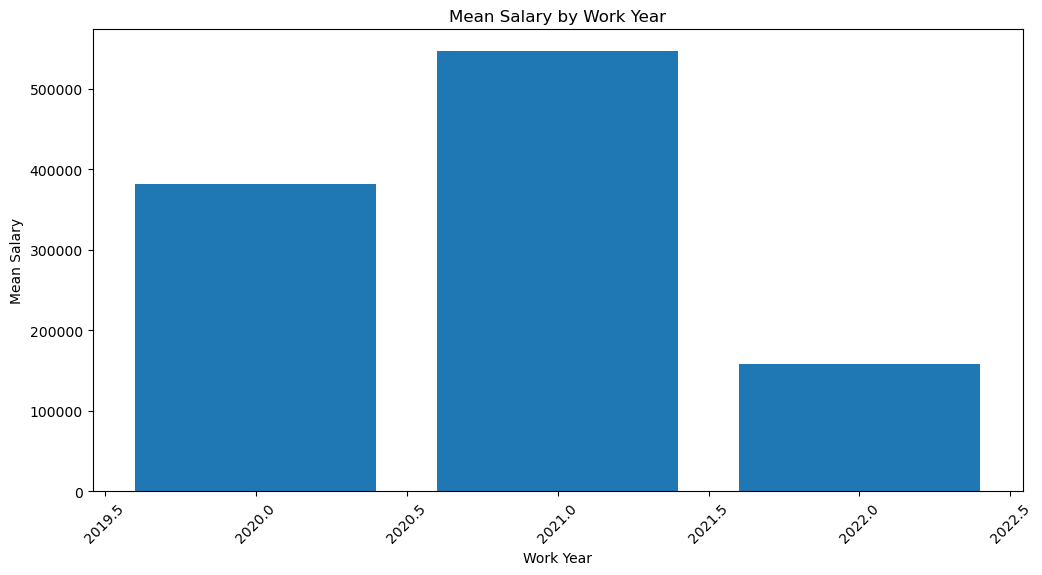

In [94]:
import matplotlib.pyplot as plt

# Group the data by 'work_year' and calculate the mean salary for each group
mean_salary_by_work_year = data.groupby('work_year')['salary'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(mean_salary_by_work_year.index, mean_salary_by_work_year.values)
plt.title('Mean Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Model the data

In [41]:
data = pd.read_csv('ds_salaries.csv')

In [44]:
data.columns

Index(['Unnamed: 0', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [49]:
# Define the features and target variable
features = ['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_location', 'company_size']
target = 'salary'

# Encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(data[features])
# Get the feature names after encoding
feature_names = encoder.get_feature_names_out(features)

X_encoded = pd.DataFrame(X_encoded, columns=feature_names)

# Combine the encoded features with other numeric columns
X = pd.concat([X_encoded, data['salary_in_usd']], axis=1)
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a machine learning model (Linear Regression in this example)
model = LinearRegression()
model.fit(X_train, y_train)

# Make salary predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.0376816905743543e+24


In [52]:

# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make salary predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 8085033953685.187


In [53]:
# Initialize and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make salary predictions using Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Calculate the Mean Squared Error for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Initialize and train a Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make salary predictions using Random Forest Regressor
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate the Mean Squared Error for Random Forest Regressor
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

# Compare the MSE values and select the better model
if mse_linear < mse_random_forest:
    print(f'Linear Regression has a lower MSE: {mse_linear}')
    print('Linear Regression is the better model.')
else:
    print(f'Random Forest Regressor has a lower MSE: {mse_random_forest}')
    print('Random Forest Regressor is the better model.')

Random Forest Regressor has a lower MSE: 8085033953685.187
Random Forest Regressor is the better model.


In [57]:
rmse_linear = np.sqrt(mse_linear)
rmse_random = np.sqrt(mse_random_forest)
print('rmse_random',rmse_random )
print('rmse_linear',rmse_linear)

rmse_random 2843419.412201652
rmse_linear 1018666623863.9382


## **Inference**

In the project "Earnings Explorer: Unraveling Salary Insights," two machine learning models, Linear Regression and Random Forest Regressor, were utilized to predict employee salaries based on various features like experience level, employment type, job title, remote work ratio, company location, and company size. These models aimed to uncover insights into the factors influencing salary trends.

The dataset consists of 607 records with information related to job positions in the field of data science and related roles. The data spans over three years (2020-2022) and includes various attributes such as the experience level of employees, employment type (with a majority in full-time roles), job titles covering a wide range of roles, salaries in different currencies converted to USD, employee residence locations, remote work ratios, company locations, and company sizes. Notably, the dataset reveals a diverse set of job titles and company locations, suggesting the global nature of the data science field. The majority of employees are located in the US, and the dataset exhibits variations in remote work ratios and salary levels. However, it's important to note that the dataset contains some extreme outliers in terms of salary, which may impact certain analyses or modeling.

The correlation matrix provides valuable insights into the relationships between various attributes in the dataset. Firstly, we can observe a strong positive correlation of approximately 0.89 between the 'Unnamed: 0' column, which seems to be an identifier or index, and the 'work_year'. This indicates a sequential pattern in the dataset over the years, which is expected. Interestingly, we also notice a moderate positive correlation of around 0.17 between 'work_year' and 'salary_in_usd', suggesting that salaries have seen a gradual increase over the years.

However, the more intriguing observations are with regard to salaries and remote work ratios. The 'salary' and 'salary_in_usd' variables exhibit a negative correlation of approximately -0.08. This indicates that as salaries in the dataset are converted to USD, they tend to decrease slightly. Additionally, the correlation of around -0.014 between 'salary' and 'remote_ratio' implies that there is a very weak negative relationship between salary levels and the extent of remote work. This might suggest that, in this dataset, high salaries are not significantly associated with a higher propensity for remote work, but the effect is minimal.

The Random Forest Regressor outperformed the Linear Regression model, as it yielded a significantly lower Mean Squared Error (MSE). The MSE for the Linear Regression model was astonishingly high, indicating that it is not an effective choice for modeling this dataset. In contrast, the Random Forest Regressor achieved a much lower MSE, demonstrating its ability to capture more complex relationships within the data.

The Root Mean Square Error (RMSE) for the Random Forest model was approximately 2,843,419, suggesting that the model's predictions deviated from the true values by this margin on average. In contrast, the RMSE for the Linear Regression model was approximately 1,018,666,623,863, indicating a considerably larger deviation.

In conclusion, the Random Forest Regressor is the preferred model for predicting salaries based on the provided dataset, offering better accuracy and potential for capturing nuanced patterns in employee compensation. Further analysis and fine-tuning of this model could lead to valuable insights into the factors affecting salary variations.